In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import seaborn as sns
import pickle

In [410]:
df=pd.read_csv("examen.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,car-price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [412]:
ex_dset=df[['horsepower','curb-weight','engine-size','highway-mpg','car-price']]
ex_dset

,horsepower,curb-weight,engine-size,highway-mpg,car-price
0,111,2548,130,27,13495
1,111,2548,130,27,16500
2,154,2823,152,26,16500
3,102,2337,109,30,13950
4,115,2824,136,22,17450
...,...,...,...,...,...
200,114,2952,141,28,16845
201,160,3049,141,25,19045
202,134,3012,173,23,21485
203,106,3217,145,27,22470


In [339]:
ex_dset.head()

,horsepower,curb-weight,engine-size,highway-mpg,car-price
0,111,2548,130,27,13495
1,111,2548,130,27,16500
2,154,2823,152,26,16500
3,102,2337,109,30,13950
4,115,2824,136,22,17450


In [384]:
ex_dset.dtypes

horsepower     object
curb-weight     int64
engine-size     int64
highway-mpg     int64
car-price      object
dtype: object

In [386]:
ex_dset=ex_dset.replace('?',np.nan)
ex_dset["car-price"]=pd.to_numeric(ex_dset["car-price"],errors="coerce")
ex_dset["horsepower"]=pd.to_numeric(ex_dset["horsepower"],errors="coerce")
ex_dset["horsepower"].fillna(ex_dset["horsepower"].mean(),inplace=True)
ex_dset["car-price"].fillna(ex_dset["car-price"].mean(),inplace=True)


C:\Users\niyom\AppData\Local\Temp\ipykernel_4868\1711836446.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ex_dset["horsepower"].fillna(ex_dset["horsepower"].mean(),inplace=True)
C:\Users\niyom\AppData\Local\Temp\ipykernel_4868\1711836446.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [345]:
x=ex_dset.iloc[:,:-1].values
y=ex_dset.iloc[:,-1].values
x

array([[ 111.        , 2548.        ,  130.        ,   27.        ],
       [ 111.        , 2548.        ,  130.        ,   27.        ],
       [ 154.        , 2823.        ,  152.        ,   26.        ],
       [ 102.        , 2337.        ,  109.        ,   30.        ],
       [ 115.        , 2824.        ,  136.        ,   22.        ],
       [ 110.        , 2507.        ,  136.        ,   25.        ],
       [ 110.        , 2844.        ,  136.        ,   25.        ],
       [ 110.        , 2954.        ,  136.        ,   25.        ],
       [ 140.        , 3086.        ,  131.        ,   20.        ],
       [ 160.        , 3053.        ,  131.        ,   22.        ],
       [ 101.        , 2395.        ,  108.        ,   29.        ],
       [ 101.        , 2395.        ,  108.        ,   29.        ],
       [ 121.        , 2710.        ,  164.        ,   28.        ],
       [ 121.        , 2765.        ,  164.        ,   28.        ],
       [ 121.        , 3055.      

In [388]:
ex_dset.isnull().sum()

horsepower     0
curb-weight    0
engine-size    0
highway-mpg    0
car-price      0
dtype: int64

In [390]:
corr=ex_dset.corr()
corr

,horsepower,curb-weight,engine-size,highway-mpg,car-price
horsepower,1.000000,0.750968,0.810713,-0.770903,0.757917
curb-weight,0.750968,1.000000,0.850594,-0.797465,0.820825
engine-size,0.810713,0.850594,1.000000,-0.677470,0.861752
highway-mpg,-0.770903,-0.797465,-0.677470,1.000000,-0.690526
car-price,0.757917,0.820825,0.861752,-0.690526,1.000000


In [392]:
plt.figure(figsize=(6,8))

<Figure size 600x800 with 0 Axes>

<Figure size 600x800 with 0 Axes>

<Axes: title={'center': 'correlation matrix'}>

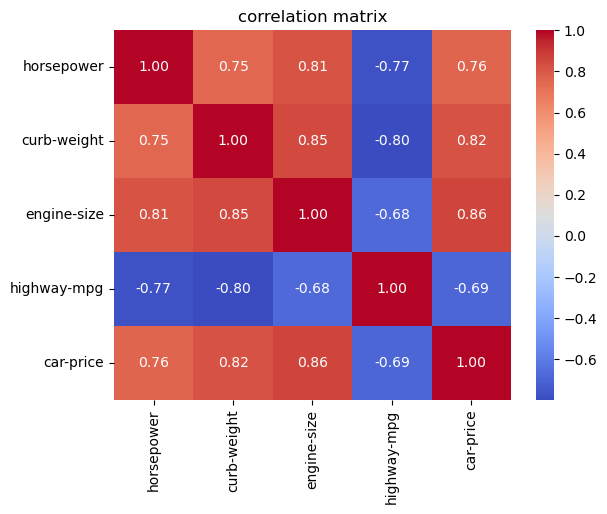

In [394]:
plt.title("correlation matrix")
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")

In [355]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train

array([[ 115., 2824.,  136.,   22.],
       [ 155., 3740.,  234.,   18.],
       [ 110., 2707.,  121.,   28.],
       [ 111., 2510.,  108.,   29.],
       [  68., 2191.,   98.,   38.],
       [  68., 1989.,   90.,   38.],
       [ 145., 2921.,  156.,   24.],
       [ 111., 2650.,  108.,   23.],
       [  85., 2275.,  109.,   34.],
       [ 140., 3086.,  131.,   20.],
       [  55., 2017.,  103.,   50.],
       [  70., 2169.,   98.,   34.],
       [  84., 2385.,  122.,   32.],
       [ 175., 2910.,  140.,   24.],
       [ 160., 3139.,  181.,   25.],
       [  64., 2443.,  122.,   42.],
       [ 162., 3045.,  130.,   22.],
       [  94., 2340.,  108.,   32.],
       [  68., 1967.,   90.,   38.],
       [  58., 1713.,   92.,   54.],
       [ 110., 2758.,  121.,   28.],
       [  86., 2372.,  110.,   33.],
       [  84., 2410.,  122.,   32.],
       [ 101., 2380.,   70.,   23.],
       [ 152., 3095.,  181.,   22.],
       [  88., 2405.,  122.,   32.],
       [  70., 1874.,   90.,   43.],
 

In [396]:
lm=LinearRegression()
lm

LinearRegression()

In [398]:
model=lm.fit(x_train,y_train)
model

LinearRegression()

In [400]:
y_pred=model.predict(x_test)
y_pred

array([ 5620.60300936, 21245.8948781 , 13632.97959183,  1003.11275991,
       10427.47137257, 15813.71322184,  5913.07397681,  6899.51117525,
       22607.86560634,  6126.32002168, 17471.46811315, 33337.36869256,
        7553.09014393, 12917.65592042,  5944.73994531, 15191.67879633,
       13664.54734188, 15805.24043715,  9418.06552727,  5875.36169645,
       11677.98871195, 14288.07797444, 13086.24971192, 15983.80076006,
       21615.67873635,  6719.01150782,  7053.70043725, 15308.60320378,
        7096.81953555,  5988.6509332 ,  9206.89937605, 10947.57275038,
       18092.90961083, 11138.47853358,  6226.77348671, 27296.33808538,
        9459.51571425, 16991.66379961,  5406.50404235, 35680.80613411,
        5774.65240709])

In [402]:
mse=mean_squared_error(y_test,y_pred)
mse

27381412.744369548

In [404]:
r2=r2_score(y_test,y_pred)
r2

0.5995124494798796

In [406]:
pickle.dump(lm,open("23RP00498.pkl","wb"))